In [1]:
import pickle 
def read_pkl(path):
    with open(path, 'rb') as f:
        data1 = pickle.load(f)
    return data1
path = '/nas/Dataset/Phoenix/phoenix-2014-keypoints.pkl'
data = read_pkl(path)
data

{'fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute': {'keypoints': array([[[109.4   ,  48.53  ,   0.9727],
          [118.    ,  41.22  ,   0.9795],
          [ 99.06  ,  43.    ,   0.985 ],
          ...,
          [101.44  , 243.4   ,   0.828 ],
          [106.6   , 245.8   ,   0.8804],
          [110.1   , 246.6   ,   0.8843]],
  
         [[108.6   ,  47.16  ,   0.966 ],
          [117.9   ,  40.2   ,   0.9604],
          [ 98.7   ,  41.8   ,   0.9736],
          ...,
          [103.    , 239.6   ,   0.842 ],
          [106.8   , 241.5   ,   0.8643],
          [109.25  , 242.2   ,   0.848 ]],
  
         [[108.    ,  46.28  ,   0.9556],
          [117.56  ,  39.7   ,   0.9785],
          [ 98.06  ,  40.66  ,   0.9683],
          ...,
          [ 99.    , 227.6   ,   0.7515],
          [102.1   , 230.5   ,   0.813 ],
          [104.06  , 231.9   ,   0.8125]],
  
         ...,
  
         [[101.75  ,  65.1   ,   0.935 ],
          [110.2  

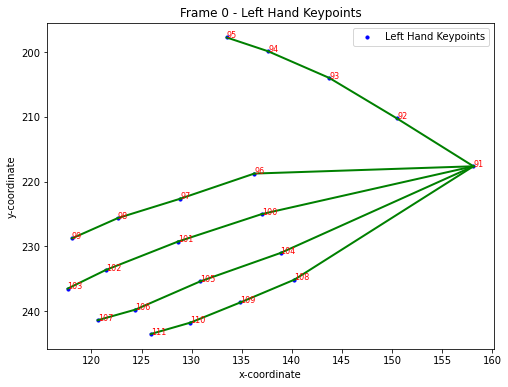

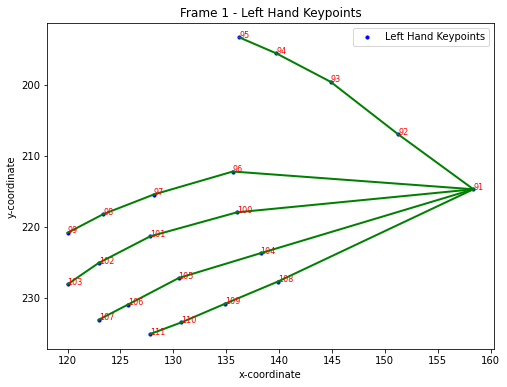

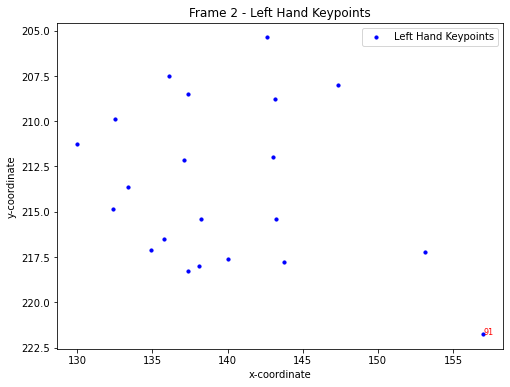

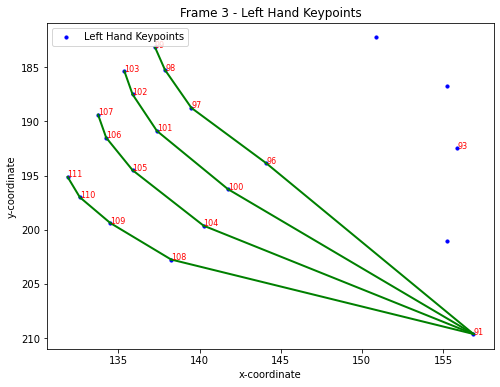

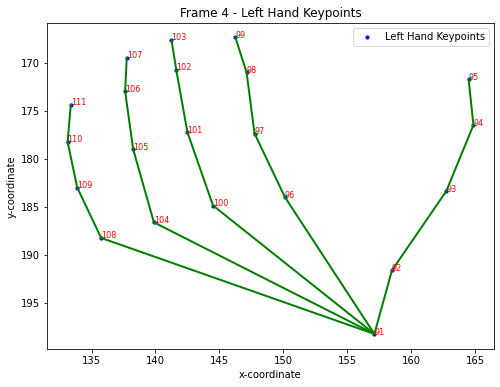

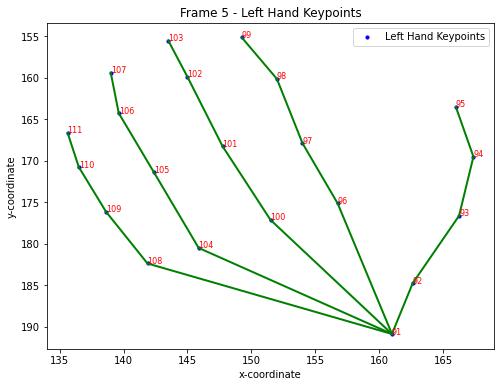

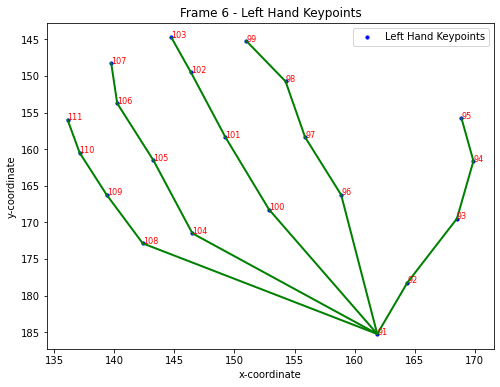

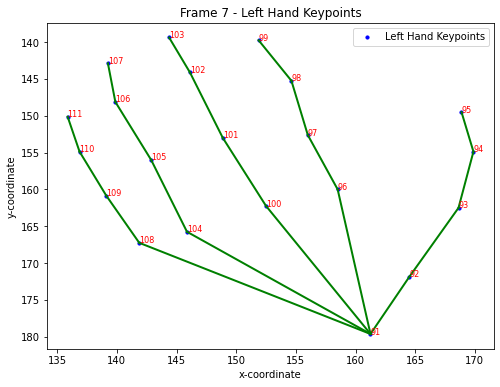

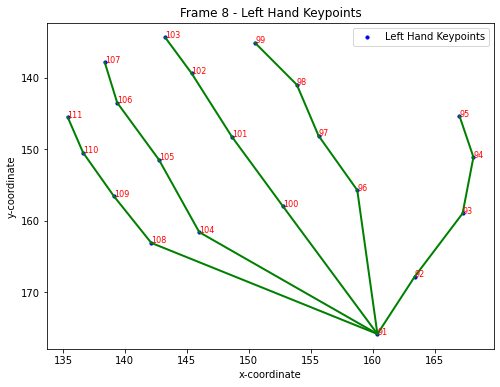

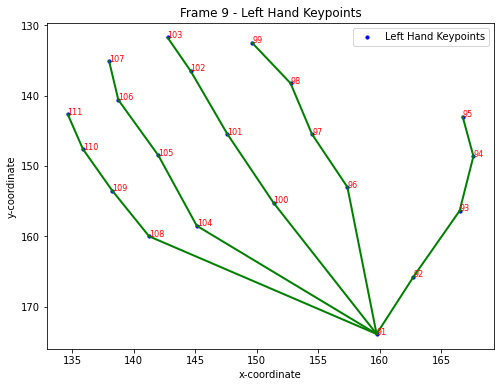

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    (91, 92), (92, 93), (93, 94), (94, 95),  # Thumb
    (91, 96), (96, 97), (97, 98), (98, 99),  # Index finger
    (91, 100), (100, 101), (101, 102), (102, 103),  # Middle finger
    (91, 104), (104, 105), (105, 106), (106, 107),  # Ring finger
    (91, 108), (108, 109), (109, 110), (110, 111)  # Pinky finger
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first 10 frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        for frame_index in range(10):  # Only iterate over the first 10 frames
            frame_keypoints = keypoints[frame_index]
            frame_image = load_image(frame_index, video_key)  # Load the corresponding image
            
            if frame_image is None:
                print(f"Image not found for frame {frame_index} in video {video_key}.")
                continue

            frame_image = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

            # Separate the keypoints for the left hand (assuming indices 91-111)
            left_hand_keypoints = frame_keypoints[91:112]

            # Create the plot
            plt.figure(figsize=(8, 6))

            # Plot left hand keypoints (in blue)
            for connection in HAND_CONNECTIONS:
                start, end = connection
                if start - 91 < len(left_hand_keypoints) and end - 91 < len(left_hand_keypoints):
                    x_start, y_start, c_start = left_hand_keypoints[start - 91]
                    x_end, y_end, c_end = left_hand_keypoints[end - 91]

                    # Check if confidence (c) for both keypoints is sufficient
                    if c_start > 0.5 and c_end > 0.5:  # Adjust threshold as needed
                        plt.plot([x_start, x_end], [y_start, y_end], color='green', linewidth=2)

            plt.scatter(left_hand_keypoints[:, 0], left_hand_keypoints[:, 1], color='blue', s=10, label='Left Hand Keypoints')

            # Add order numbers next to each keypoint
            for i, (x, y, c) in enumerate(left_hand_keypoints):  # Unpack x, y, and c
                if c > 0.5:  # Only label visible keypoints
                    plt.text(x, y, f'{i+91}', fontsize=8, color='red')  # i+91 to show original index

            # Customize plot
            plt.title(f"Frame {frame_index} - Left Hand Keypoints")
            plt.xlabel('x-coordinate')
            plt.ylabel('y-coordinate')
            plt.legend()
            plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
            plt.show()


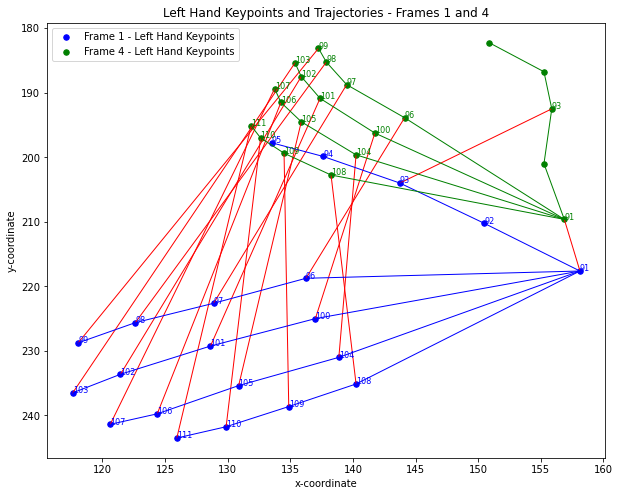

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    (91, 92), (92, 93), (93, 94), (94, 95),  # Thumb
    (91, 96), (96, 97), (97, 98), (98, 99),  # Index finger
    (91, 100), (100, 101), (101, 102), (102, 103),  # Middle finger
    (91, 104), (104, 105), (105, 106), (106, 107),  # Ring finger
    (91, 108), (108, 109), (109, 110), (110, 111)  # Pinky finger
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fourth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fourth frame keypoints
        frame_1_keypoints = keypoints[0]
        frame_4_keypoints = keypoints[3]

        # Separate the keypoints for the left hand (assuming indices 91-111)
        left_hand_keypoints_1 = frame_1_keypoints[91:112]
        left_hand_keypoints_4 = frame_4_keypoints[91:112]

        # Create the plot
        plt.figure(figsize=(10, 8))

        # Plot the left hand keypoints for the first frame (in blue)
        plt.scatter(left_hand_keypoints_1[:, 0], left_hand_keypoints_1[:, 1], color='blue', s=30, label='Frame 1 - Left Hand Keypoints')

        # Plot the left hand keypoints for the fourth frame (in green)
        plt.scatter(left_hand_keypoints_4[:, 0], left_hand_keypoints_4[:, 1], color='green', s=30, label='Frame 4 - Left Hand Keypoints')

        # Add lines to connect corresponding keypoints to visualize the movement (trajectories)
        for i in range(len(left_hand_keypoints_1)):
            x1, y1, c1 = left_hand_keypoints_1[i]
            x4, y4, c4 = left_hand_keypoints_4[i]
            if c1 > 0.5 and c4 > 0.5:  # Only connect keypoints with sufficient confidence
                plt.plot([x1, x4], [y1, y4], color='red', linestyle='-', linewidth=1)

        # Add lines for the predefined connections between keypoints in the first frame (blue)
        for connection in HAND_CONNECTIONS:
            x1, y1, _ = left_hand_keypoints_1[connection[0] - 91]  # Adjust index
            x2, y2, _ = left_hand_keypoints_1[connection[1] - 91]  # Adjust index
            plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)

        # Add lines for the predefined connections between keypoints in the fourth frame (green)
        for connection in HAND_CONNECTIONS:
            x1, y1, _ = left_hand_keypoints_4[connection[0] - 91]  # Adjust index
            x2, y2, _ = left_hand_keypoints_4[connection[1] - 91]  # Adjust index
            plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Add labels for the keypoints in frame 1
        for i, (x, y, c) in enumerate(left_hand_keypoints_1):  # Unpack x, y, and c
            if c > 0.5:
                plt.text(x, y, f'{i+91}', fontsize=8, color='blue')

        # Add labels for the keypoints in frame 4
        for i, (x, y, c) in enumerate(left_hand_keypoints_4):  # Unpack x, y, and c
            if c > 0.5:
                plt.text(x, y, f'{i+91}', fontsize=8, color='green')

        # Customize plot
        plt.title(f"Left Hand Keypoints and Trajectories - Frames 1 and 4")
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
        plt.show()


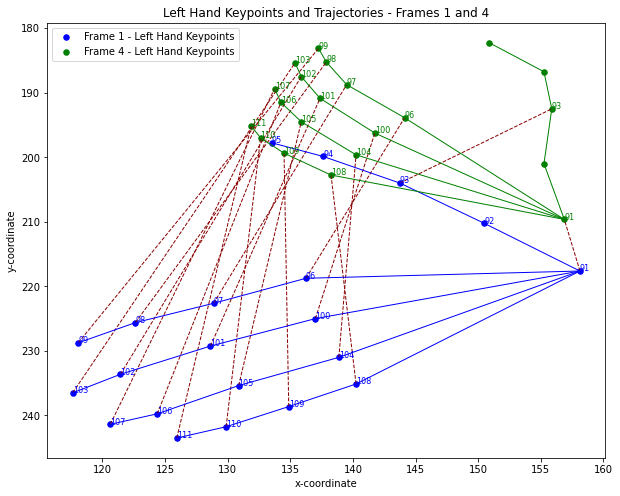

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    (91, 92), (92, 93), (93, 94), (94, 95),  # Thumb
    (91, 96), (96, 97), (97, 98), (98, 99),  # Index finger
    (91, 100), (100, 101), (101, 102), (102, 103),  # Middle finger
    (91, 104), (104, 105), (105, 106), (106, 107),  # Ring finger
    (91, 108), (108, 109), (109, 110), (110, 111)  # Pinky finger
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fourth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fourth frame keypoints
        frame_1_keypoints = keypoints[0]
        frame_4_keypoints = keypoints[3]

        # Separate the keypoints for the left hand (assuming indices 91-111)
        left_hand_keypoints_1 = frame_1_keypoints[91:112]
        left_hand_keypoints_4 = frame_4_keypoints[91:112]

        # Create the plot
        plt.figure(figsize=(10, 8))

        # Plot the left hand keypoints for the first frame (in blue)
        plt.scatter(left_hand_keypoints_1[:, 0], left_hand_keypoints_1[:, 1], color='blue', s=30, label='Frame 1 - Left Hand Keypoints')

        # Plot the left hand keypoints for the fourth frame (in green)
        plt.scatter(left_hand_keypoints_4[:, 0], left_hand_keypoints_4[:, 1], color='green', s=30, label='Frame 4 - Left Hand Keypoints')

        # Add dashed lines (lower color) for the trajectory between corresponding keypoints from frames 1 to 4
        for i in range(len(left_hand_keypoints_1)):
            x1, y1, c1 = left_hand_keypoints_1[i]
            x4, y4, c4 = left_hand_keypoints_4[i]
            if c1 > 0.5 and c4 > 0.5:  # Only connect keypoints with sufficient confidence
                plt.plot([x1, x4], [y1, y4], color='darkred', linestyle='--', linewidth=1)

        # Add lines for the predefined connections between keypoints in the first frame (blue)
        for connection in HAND_CONNECTIONS:
            x1, y1, _ = left_hand_keypoints_1[connection[0] - 91]  # Adjust index
            x2, y2, _ = left_hand_keypoints_1[connection[1] - 91]  # Adjust index
            plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)

        # Add lines for the predefined connections between keypoints in the fourth frame (green)
        for connection in HAND_CONNECTIONS:
            x1, y1, _ = left_hand_keypoints_4[connection[0] - 91]  # Adjust index
            x2, y2, _ = left_hand_keypoints_4[connection[1] - 91]  # Adjust index
            plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Add labels for the keypoints in frame 1
        for i, (x, y, c) in enumerate(left_hand_keypoints_1):  # Unpack x, y, and c
            if c > 0.5:
                plt.text(x, y, f'{i+91}', fontsize=8, color='blue')

        # Add labels for the keypoints in frame 4
        for i, (x, y, c) in enumerate(left_hand_keypoints_4):  # Unpack x, y, and c
            if c > 0.5:
                plt.text(x, y, f'{i+91}', fontsize=8, color='green')

        # Customize plot
        plt.title(f"Left Hand Keypoints and Trajectories - Frames 1 and 4")
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
        plt.show()


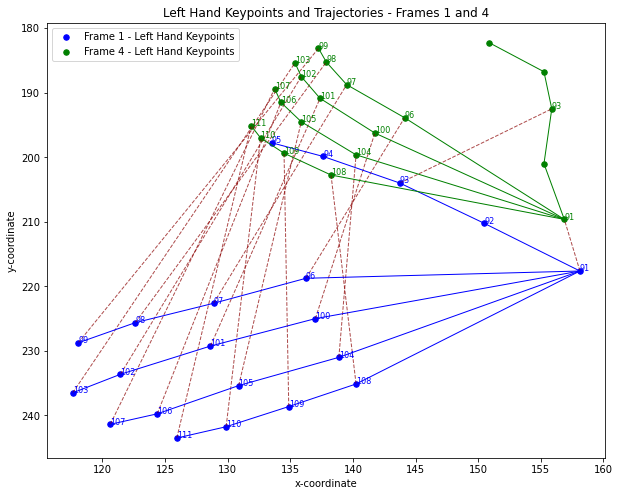

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    (91, 92), (92, 93), (93, 94), (94, 95),  # Thumb
    (91, 96), (96, 97), (97, 98), (98, 99),  # Index finger
    (91, 100), (100, 101), (101, 102), (102, 103),  # Middle finger
    (91, 104), (104, 105), (105, 106), (106, 107),  # Ring finger
    (91, 108), (108, 109), (109, 110), (110, 111)  # Pinky finger
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fourth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fourth frame keypoints
        frame_1_keypoints = keypoints[0]
        frame_4_keypoints = keypoints[3]

        # Separate the keypoints for the left hand (assuming indices 91-111)
        left_hand_keypoints_1 = frame_1_keypoints[91:112]
        left_hand_keypoints_4 = frame_4_keypoints[91:112]

        # Create the plot
        plt.figure(figsize=(10, 8))

        # Plot the left hand keypoints for the first frame (in blue)
        plt.scatter(left_hand_keypoints_1[:, 0], left_hand_keypoints_1[:, 1], color='blue', s=30, label='Frame 1 - Left Hand Keypoints')

        # Plot the left hand keypoints for the fourth frame (in green)
        plt.scatter(left_hand_keypoints_4[:, 0], left_hand_keypoints_4[:, 1], color='green', s=30, label='Frame 4 - Left Hand Keypoints')

        # Add dashed lines (lower color) for the trajectory between corresponding keypoints from frames 1 to 4
        for i in range(len(left_hand_keypoints_1)):
            x1, y1, c1 = left_hand_keypoints_1[i]
            x4, y4, c4 = left_hand_keypoints_4[i]
            if c1 > 0.5 and c4 > 0.5:  # Only connect keypoints with sufficient confidence
                plt.plot([x1, x4], [y1, y4], color='darkred', linestyle='--', linewidth=1, alpha=0.7)

        # Add lines for the predefined connections between keypoints in the first frame (blue)
        for connection in HAND_CONNECTIONS:
            x1, y1, _ = left_hand_keypoints_1[connection[0] - 91]  # Adjust index
            x2, y2, _ = left_hand_keypoints_1[connection[1] - 91]  # Adjust index
            plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)

        # Add lines for the predefined connections between keypoints in the fourth frame (green)
        for connection in HAND_CONNECTIONS:
            x1, y1, _ = left_hand_keypoints_4[connection[0] - 91]  # Adjust index
            x2, y2, _ = left_hand_keypoints_4[connection[1] - 91]  # Adjust index
            plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Add labels for the keypoints in frame 1
        for i, (x, y, c) in enumerate(left_hand_keypoints_1):  # Unpack x, y, and c
            if c > 0.5:
                plt.text(x, y, f'{i+91}', fontsize=8, color='blue')

        # Add labels for the keypoints in frame 4
        for i, (x, y, c) in enumerate(left_hand_keypoints_4):  # Unpack x, y, and c
            if c > 0.5:
                plt.text(x, y, f'{i+91}', fontsize=8, color='green')

        # Customize plot
        plt.title(f"Left Hand Keypoints and Trajectories - Frames 1 and 4")
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
        plt.show()


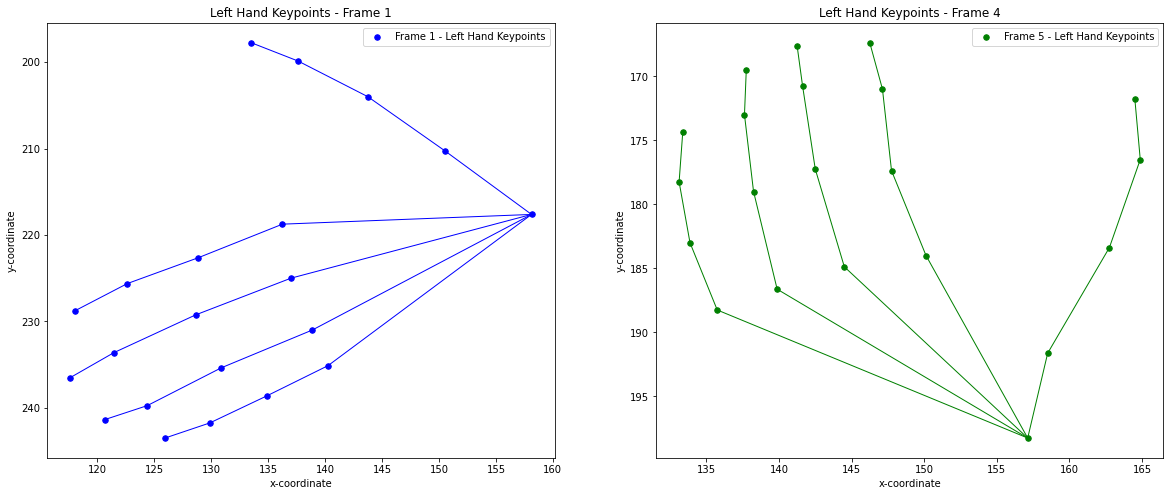

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    (91, 92), (92, 93), (93, 94), (94, 95),  # Thumb
    (91, 96), (96, 97), (97, 98), (98, 99),  # Index finger
    (91, 100), (100, 101), (101, 102), (102, 103),  # Middle finger
    (91, 104), (104, 105), (105, 106), (106, 107),  # Ring finger
    (91, 108), (108, 109), (109, 110), (110, 111)  # Pinky finger
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fourth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fourth frame keypoints
        frame_1_keypoints = keypoints[0]
        frame_5_keypoints = keypoints[4]

        # Separate the keypoints for the left hand (assuming indices 91-111)
        left_hand_keypoints_1 = frame_1_keypoints[91:112]
        left_hand_keypoints_4 = frame_5_keypoints[91:112]

        # Create subplots
        fig, ax = plt.subplots(1, 2, figsize=(20, 8))

        # Plot the left hand keypoints for the first frame (in blue)
        ax[0].scatter(left_hand_keypoints_1[:, 0], left_hand_keypoints_1[:, 1], color='blue', s=30, label='Frame 1 - Left Hand Keypoints')
        for connection in HAND_CONNECTIONS:
            x1, y1, _ = left_hand_keypoints_1[connection[0] - 91]  # Adjust index
            x2, y2, _ = left_hand_keypoints_1[connection[1] - 91]  # Adjust index
            ax[0].plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)

        # Plot the left hand keypoints for the fourth frame (in green)
        ax[1].scatter(left_hand_keypoints_5[:, 0], left_hand_keypoints_5[:, 1], color='green', s=30, label='Frame 5 - Left Hand Keypoints')
        for connection in HAND_CONNECTIONS:
            x1, y1, _ = left_hand_keypoints_5[connection[0] - 91]  # Adjust index
            x2, y2, _ = left_hand_keypoints_5[connection[1] - 91]  # Adjust index
            ax[1].plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Add titles and invert y-axis for both subplots
        for i in range(2):
            ax[i].set_title(f"Left Hand Keypoints - Frame {i*3+1}")
            ax[i].invert_yaxis()
            ax[i].set_xlabel('x-coordinate')
            ax[i].set_ylabel('y-coordinate')
            ax[i].legend()

        # Show the plot
        plt.show()


No handles with labels found to put in legend.


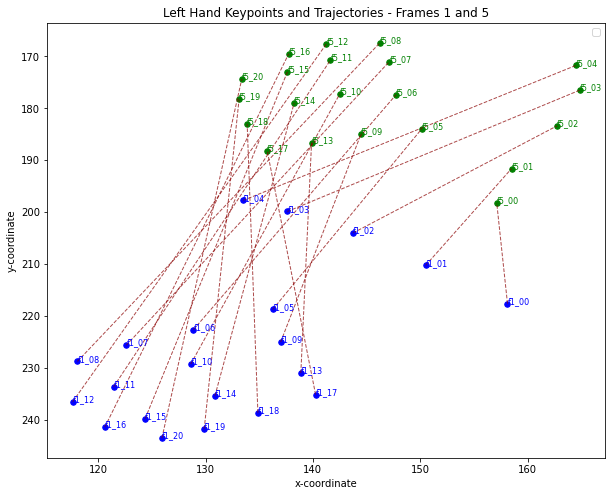

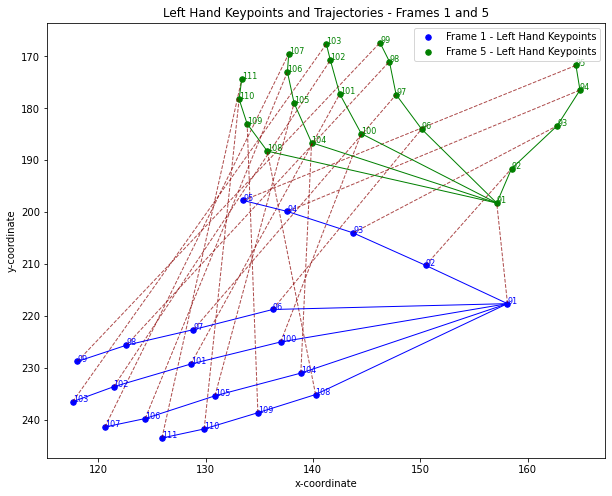

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    (91, 92), (92, 93), (93, 94), (94, 95),  # Thumb
    (91, 96), (96, 97), (97, 98), (98, 99),  # Index finger
    (91, 100), (100, 101), (101, 102), (102, 103),  # Middle finger
    (91, 104), (104, 105), (105, 106), (106, 107),  # Ring finger
    (91, 108), (108, 109), (109, 110), (110, 111)  # Pinky finger
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fourth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fourth frame keypoints
        frame_1_keypoints = keypoints[0]
        frame_5_keypoints = keypoints[4]

        # Separate the keypoints for the left hand (assuming indices 91-111)
        left_hand_keypoints_1 = frame_1_keypoints[91:112]
        left_hand_keypoints_5 = frame_5_keypoints[91:112]

        # Create the plot
        plt.figure(figsize=(10, 8))

        # Plot the left hand keypoints for the first frame (in blue)
        plt.scatter(left_hand_keypoints_1[:, 0], left_hand_keypoints_1[:, 1], color='blue', s=30, label='Frame 1 - Left Hand Keypoints')

        # Plot the left hand keypoints for the fourth frame (in green)
        plt.scatter(left_hand_keypoints_5[:, 0], left_hand_keypoints_5[:, 1], color='green', s=30, label='Frame 5 - Left Hand Keypoints')

        # Add dashed lines (lower color) for the trajectory between corresponding keypoints from frames 1 to 4
        for i in range(len(left_hand_keypoints_1)):
            x1, y1, c1 = left_hand_keypoints_1[i]
            x5, y5, c5 = left_hand_keypoints_5[i]
            if c1 > 0.5 and c5 > 0.5:  # Only connect keypoints with sufficient confidence
                plt.plot([x1, x5], [y1, y5], color='darkred', linestyle='--', linewidth=1, alpha=0.7)

        # Add lines for the predefined connections between keypoints in the first frame (blue)
        for connection in HAND_CONNECTIONS:
            x1, y1, _ = left_hand_keypoints_1[connection[0] - 91]  # Adjust index
            x2, y2, _ = left_hand_keypoints_1[connection[1] - 91]  # Adjust index
            plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)

        # Add lines for the predefined connections between keypoints in the fourth frame (green)
        for connection in HAND_CONNECTIONS:
            x1, y1, _ = left_hand_keypoints_5[connection[0] - 91]  # Adjust index
            x2, y2, _ = left_hand_keypoints_5[connection[1] - 91]  # Adjust index
            plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Add labels for the keypoints in frame 1
        for i, (x, y, c) in enumerate(left_hand_keypoints_1):  # Unpack x, y, and c
            if c > 0.5:
                plt.text(x, y, f'{i+91}', fontsize=8, color='blue')

        # Add labels for the keypoints in frame 4
        for i, (x, y, c) in enumerate(left_hand_keypoints_5):  # Unpack x, y, and c
            if c > 0.5:
                plt.text(x, y, f'{i+91}', fontsize=8, color='green')

        # Customize plot
        plt.title(f"Left Hand Keypoints and Trajectories - Frames 1 and 5")
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
        plt.show()


No handles with labels found to put in legend.


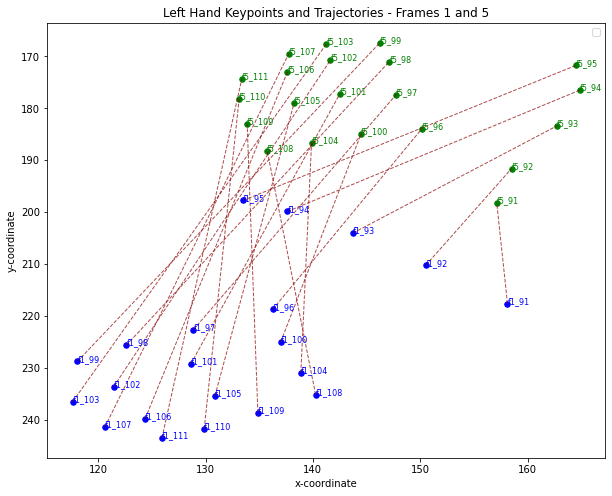

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    ("f1_01", "f1_14"), ("f1_14", "f1_13"), ("f1_13", "f1_12"), ("f1_12", "f1_11"),  # Thumb
    ("f1_01", "f1_14"), ("f1_14", "f5_13"), ("f5_13", "f5_12"), ("f5_12", "f5_11"), ("f5_11", "f5_01"),  # Index finger
    ("f1_01", "f5_13"), ("f5_13", "f5_12"), ("f5_12", "f5_11"), ("f5_11", "f5_01"),  # Middle finger
    ("f1_01", "f5_13"), ("f5_13", "f5_12"), ("f5_12", "f5_11"), ("f5_11", "f5_01"),  # Ring finger
    ("f1_01", "f5_13"), ("f5_13", "f5_12"), ("f5_12", "f5_11"), ("f5_11", "f5_01")  # Pinky finger
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fifth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fifth frame keypoints
        frame_1_keypoints = keypoints[0][91:112]
        frame_5_keypoints = keypoints[4][91:112]

        # Create mappings for the keypoints
        keypoints_1 = {f"f1_{str(i).zfill(2)}": frame_1_keypoints[i-91] for i in range(91, 112)}
        keypoints_5 = {f"f5_{str(i).zfill(2)}": frame_5_keypoints[i-91] for i in range(91, 112)}

        # Create the plot
        plt.figure(figsize=(10, 8))

        # Plot the keypoints for the first frame
        for label, point in keypoints_1.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='blue', s=30)
                plt.text(x, y, label, fontsize=8, color='blue')

        # Plot the keypoints for the fifth frame
        for label, point in keypoints_5.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='green', s=30)
                plt.text(x, y, label, fontsize=8, color='green')

        # Add dashed lines for the trajectory between corresponding keypoints from frames 1 to 5
        for i in range(91, 112):
            label1 = f"f1_{str(i).zfill(2)}"
            label5 = f"f5_{str(i).zfill(2)}"
            if label1 in keypoints_1 and label5 in keypoints_5:
                x1, y1, c1 = keypoints_1[label1]
                x5, y5, c5 = keypoints_5[label5]
                if c1 > 0.5 and c5 > 0.5:
                    plt.plot([x1, x5], [y1, y5], color='darkred', linestyle='--', linewidth=1, alpha=0.7)

        # Add lines for the predefined connections
        for connection in HAND_CONNECTIONS:
            if connection[0] in keypoints_1 and connection[1] in keypoints_1:
                x1, y1, _ = keypoints_1[connection[0]]
                x2, y2, _ = keypoints_1[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)
            if connection[0] in keypoints_5 and connection[1] in keypoints_5:
                x1, y1, _ = keypoints_5[connection[0]]
                x2, y2, _ = keypoints_5[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Customize plot
        plt.title(f"Left Hand Keypoints and Trajectories - Frames 1 and 5")
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
        plt.show()


No handles with labels found to put in legend.


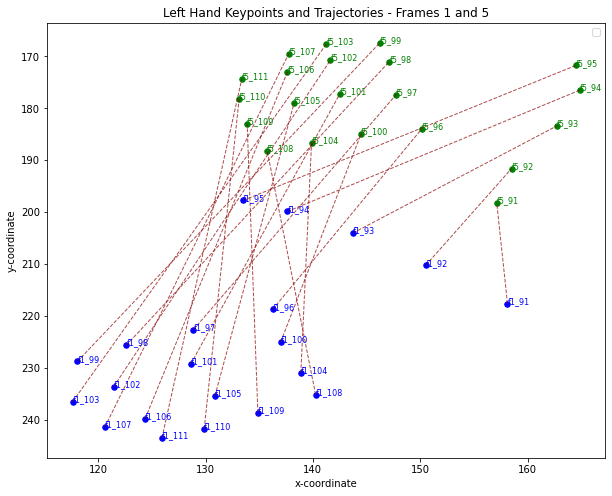

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    ("f1_01", "f1_02"), ("f1_02", "f1_03"), ("f1_03", "f1_04"), ("f1_04", "f1_05"),  # Thumb
    ("f1_01", "f1_06"), ("f1_06", "f1_07"), ("f1_07", "f1_08"), ("f1_08", "f1_09"),  # Index finger
    ("f1_01", "f1_10"), ("f1_10", "f1_11"), ("f1_11", "f1_12"), ("f1_12", "f1_13"),  # Middle finger
    ("f1_01", "f1_14"), ("f1_14", "f1_15"), ("f1_15", "f1_16"), ("f1_16", "f1_17"),  # Ring finger
    ("f1_01", "f1_18"), ("f1_18", "f1_19"), ("f1_19", "f1_20"), ("f1_20", "f1_21"),  # Pinky finger
    ("f5_01", "f5_02"), ("f5_02", "f5_03"), ("f5_03", "f5_04"), ("f5_04", "f5_05"),  # Thumb
    ("f5_01", "f5_06"), ("f5_06", "f5_07"), ("f5_07", "f5_08"), ("f5_08", "f5_09"),  # Index finger
    ("f5_01", "f5_10"), ("f5_10", "f5_11"), ("f5_11", "f5_12"), ("f5_12", "f5_13"),  # Middle finger
    ("f5_01", "f5_14"), ("f5_14", "f5_15"), ("f5_15", "f5_16"), ("f5_16", "f5_17"),  # Ring finger
    ("f5_01", "f5_18"), ("f5_18", "f5_19"), ("f5_19", "f5_20"), ("f5_20", "f5_21")   # Pinky finger
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fifth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fifth frame keypoints
        frame_1_keypoints = keypoints[0][91:112]
        frame_5_keypoints = keypoints[4][91:112]

        # Create mappings for the keypoints
        keypoints_1 = {f"f1_{str(i).zfill(2)}": frame_1_keypoints[i-91] for i in range(91, 112)}
        keypoints_5 = {f"f5_{str(i).zfill(2)}": frame_5_keypoints[i-91] for i in range(91, 112)}

        # Create the plot
        plt.figure(figsize=(10, 8))

        # Plot the keypoints for the first frame
        for label, point in keypoints_1.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='blue', s=30)
                plt.text(x, y, label, fontsize=8, color='blue')

        # Plot the keypoints for the fifth frame
        for label, point in keypoints_5.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='green', s=30)
                plt.text(x, y, label, fontsize=8, color='green')

        # Add dashed lines for the trajectory between corresponding keypoints from frames 1 to 5
        for i in range(91, 112):
            label1 = f"f1_{str(i).zfill(2)}"
            label5 = f"f5_{str(i).zfill(2)}"
            if label1 in keypoints_1 and label5 in keypoints_5:
                x1, y1, c1 = keypoints_1[label1]
                x5, y5, c5 = keypoints_5[label5]
                if c1 > 0.5 and c5 > 0.5:
                    plt.plot([x1, x5], [y1, y5], color='darkred', linestyle='--', linewidth=1, alpha=0.7)

        # Add lines for the predefined connections
        for connection in HAND_CONNECTIONS:
            if connection[0] in keypoints_1 and connection[1] in keypoints_1:
                x1, y1, _ = keypoints_1[connection[0]]
                x2, y2, _ = keypoints_1[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)
            if connection[0] in keypoints_5 and connection[1] in keypoints_5:
                x1, y1, _ = keypoints_5[connection[0]]
                x2, y2, _ = keypoints_5[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Customize plot
        plt.title(f"Left Hand Keypoints and Trajectories - Frames 1 and 5")
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
        plt.show()


No handles with labels found to put in legend.


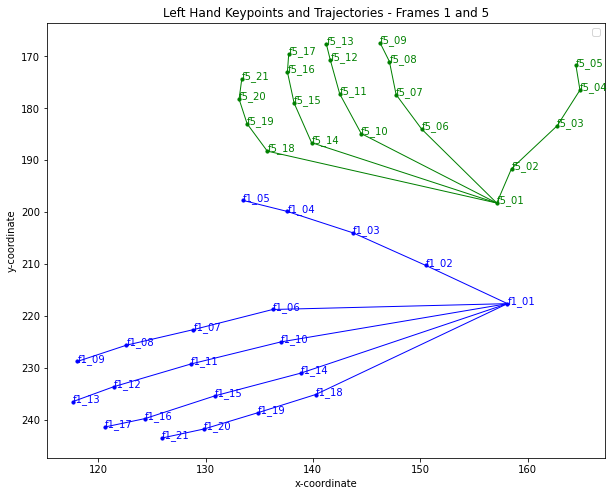

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    # Thumb connections
    ("f1_01", "f1_02"), ("f1_02", "f1_03"), ("f1_03", "f1_04"), ("f1_04", "f1_05"),
    ("f5_01", "f5_02"), ("f5_02", "f5_03"), ("f5_03", "f5_04"), ("f5_04", "f5_05"),
    # Index finger connections
    ("f1_01", "f1_06"), ("f1_06", "f1_07"), ("f1_07", "f1_08"), ("f1_08", "f1_09"),
    ("f5_01", "f5_06"), ("f5_06", "f5_07"), ("f5_07", "f5_08"), ("f5_08", "f5_09"),
    # Middle finger connections
    ("f1_01", "f1_10"), ("f1_10", "f1_11"), ("f1_11", "f1_12"), ("f1_12", "f1_13"),
    ("f5_01", "f5_10"), ("f5_10", "f5_11"), ("f5_11", "f5_12"), ("f5_12", "f5_13"),
    # Ring finger connections
    ("f1_01", "f1_14"), ("f1_14", "f1_15"), ("f1_15", "f1_16"), ("f1_16", "f1_17"),
    ("f5_01", "f5_14"), ("f5_14", "f5_15"), ("f5_15", "f5_16"), ("f5_16", "f5_17"),
    # Pinky finger connections
    ("f1_01", "f1_18"), ("f1_18", "f1_19"), ("f1_19", "f1_20"), ("f1_20", "f1_21"),
    ("f5_01", "f5_18"), ("f5_18", "f5_19"), ("f5_19", "f5_20"), ("f5_20", "f5_21")
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fifth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fifth frame keypoints
        frame_1_keypoints = keypoints[0][91:112]
        frame_5_keypoints = keypoints[4][91:112]

        # Create mappings for the keypoints
        keypoints_1 = {f"f1_{str(i-90).zfill(2)}": frame_1_keypoints[i-91] for i in range(91, 112)}
        keypoints_5 = {f"f5_{str(i-90).zfill(2)}": frame_5_keypoints[i-91] for i in range(91, 112)}

        # Create the plot
        plt.figure(figsize=(10, 8))

        # Plot the keypoints for the first frame
        for label, point in keypoints_1.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='blue', s=10)
                plt.text(x, y, label, fontsize=10, color='blue')

        # Plot the keypoints for the fifth frame
        for label, point in keypoints_5.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='green', s=10)
                plt.text(x, y, label, fontsize=10, color='green')

        # Add dashed lines for the trajectory between corresponding keypoints from frames 1 to 5
        for i in range(91, 112):
            label1 = f"f1_{str(i-90).zfill(2)}"
            label5 = f"f5_{str(i-90).zfill(2)}"
            if label1 in keypoints_1 and label5 in keypoints_5:
                x1, y1, c1 = keypoints_1[label1]
                x5, y5, c5 = keypoints_5[label5]
                if c1 > 0.5 and c5 > 0.5:
                    pass
                   # plt.plot([x1, x5], [y1, y5], color='darkred', linestyle='--', linewidth=1, alpha=0.7)

        # Add lines for the predefined connections
        for connection in HAND_CONNECTIONS:
            if connection[0] in keypoints_1 and connection[1] in keypoints_1:
                x1, y1, _ = keypoints_1[connection[0]]
                x2, y2, _ = keypoints_1[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)
            if connection[0] in keypoints_5 and connection[1] in keypoints_5:
                x1, y1, _ = keypoints_5[connection[0]]
                x2, y2, _ = keypoints_5[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Customize plot
        plt.title(f"Left Hand Keypoints and Trajectories - Frames 1 and 5")
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
        plt.show()


No handles with labels found to put in legend.


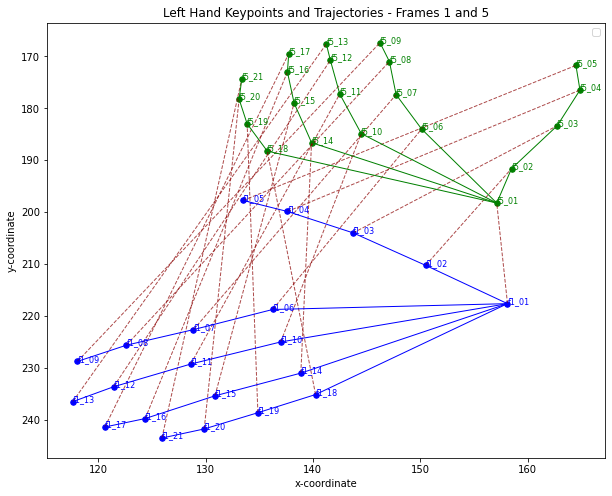

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    # Thumb connections
    ("f1_01", "f1_02"), ("f1_02", "f1_03"), ("f1_03", "f1_04"), ("f1_04", "f1_05"),
    ("f5_01", "f5_02"), ("f5_02", "f5_03"), ("f5_03", "f5_04"), ("f5_04", "f5_05"),
    # Index finger connections
    ("f1_01", "f1_06"), ("f1_06", "f1_07"), ("f1_07", "f1_08"), ("f1_08", "f1_09"),
    ("f5_01", "f5_06"), ("f5_06", "f5_07"), ("f5_07", "f5_08"), ("f5_08", "f5_09"),
    # Middle finger connections
    ("f1_01", "f1_10"), ("f1_10", "f1_11"), ("f1_11", "f1_12"), ("f1_12", "f1_13"),
    ("f5_01", "f5_10"), ("f5_10", "f5_11"), ("f5_11", "f5_12"), ("f5_12", "f5_13"),
    # Ring finger connections
    ("f1_01", "f1_14"), ("f1_14", "f1_15"), ("f1_15", "f1_16"), ("f1_16", "f1_17"),
    ("f5_01", "f5_14"), ("f5_14", "f5_15"), ("f5_15", "f5_16"), ("f5_16", "f5_17"),
    # Pinky finger connections
    ("f1_01", "f1_18"), ("f1_18", "f1_19"), ("f1_19", "f1_20"), ("f1_20", "f1_21"),
    ("f5_01", "f5_18"), ("f5_18", "f5_19"), ("f5_19", "f5_20"), ("f5_20", "f5_21")
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fifth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fifth frame keypoints
        frame_1_keypoints = keypoints[0][91:112]
        frame_5_keypoints = keypoints[4][91:112]

        # Create mappings for the keypoints
        keypoints_1 = {f"f1_{str(i-90).zfill(2)}": frame_1_keypoints[i-91] for i in range(91, 112)}
        keypoints_5 = {f"f5_{str(i-90).zfill(2)}": frame_5_keypoints[i-91] for i in range(91, 112)}

        # Create the plot
        plt.figure(figsize=(10, 8))

        # Plot the keypoints for the first frame
        for label, point in keypoints_1.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='blue', s=30)
                plt.text(x, y, label, fontsize=8, color='blue')

        # Plot the keypoints for the fifth frame
        for label, point in keypoints_5.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='green', s=30)
                plt.text(x, y, label, fontsize=8, color='green')

        # Add dashed lines for the trajectory between corresponding keypoints from frames 1 to 5
        for i in range(91, 112):
            label1 = f"f1_{str(i-90).zfill(2)}"
            label5 = f"f5_{str(i-90).zfill(2)}"
            if label1 in keypoints_1 and label5 in keypoints_5:
                x1, y1, c1 = keypoints_1[label1]
                x5, y5, c5 = keypoints_5[label5]
                if c1 > 0.5 and c5 > 0.5:
                    plt.plot([x1, x5], [y1, y5], color='darkred', linestyle='--', linewidth=1, alpha=0.7)

        # Add lines for the predefined connections
        for connection in HAND_CONNECTIONS:
            if connection[0] in keypoints_1 and connection[1] in keypoints_1:
                x1, y1, _ = keypoints_1[connection[0]]
                x2, y2, _ = keypoints_1[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)
            if connection[0] in keypoints_5 and connection[1] in keypoints_5:
                x1, y1, _ = keypoints_5[connection[0]]
                x2, y2, _ = keypoints_5[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Customize plot
        plt.title(f"Left Hand Keypoints and Trajectories - Frames 1 and 5")
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
        plt.show()


No handles with labels found to put in legend.


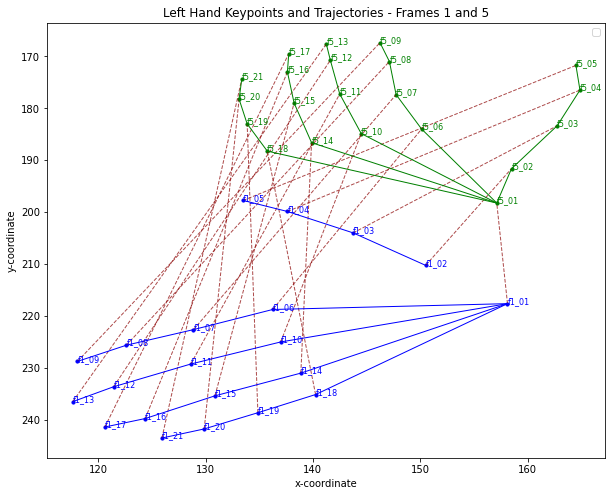

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    # Thumb connections
    ("f^(1)_01", "f1_02"), ("f1_02", "f1_03"), ("f1_03", "f1_04"), ("f1_04", "f1_05"),
    ("f5_01", "f5_02"), ("f5_02", "f5_03"), ("f5_03", "f5_04"), ("f5_04", "f5_05"),
    # Index finger connections
    ("f1_01", "f1_06"), ("f1_06", "f1_07"), ("f1_07", "f1_08"), ("f1_08", "f1_09"),
    ("f5_01", "f5_06"), ("f5_06", "f5_07"), ("f5_07", "f5_08"), ("f5_08", "f5_09"),
    # Middle finger connections
    ("f1_01", "f1_10"), ("f1_10", "f1_11"), ("f1_11", "f1_12"), ("f1_12", "f1_13"),
    ("f5_01", "f5_10"), ("f5_10", "f5_11"), ("f5_11", "f5_12"), ("f5_12", "f5_13"),
    # Ring finger connections
    ("f1_01", "f1_14"), ("f1_14", "f1_15"), ("f1_15", "f1_16"), ("f1_16", "f1_17"),
    ("f5_01", "f5_14"), ("f5_14", "f5_15"), ("f5_15", "f5_16"), ("f5_16", "f5_17"),
    # Pinky finger connections
    ("f1_01", "f1_18"), ("f1_18", "f1_19"), ("f1_19", "f1_20"), ("f1_20", "f1_21"),
    ("f5_01", "f5_18"), ("f5_18", "f5_19"), ("f5_19", "f5_20"), ("f5_20", "f5_21")
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fifth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fifth frame keypoints
        frame_1_keypoints = keypoints[0][91:112]
        frame_5_keypoints = keypoints[4][91:112]

        # Create mappings for the keypoints
        keypoints_1 = {f"f1_{str(i-90).zfill(2)}": frame_1_keypoints[i-91] for i in range(91, 112)}
        keypoints_5 = {f"f5_{str(i-90).zfill(2)}": frame_5_keypoints[i-91] for i in range(91, 112)}

        # Create the plot
        plt.figure(figsize=(10, 8))

        # Plot the keypoints for the first frame
        for label, point in keypoints_1.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='blue', s=10)
                plt.text(x, y, label, fontsize=8, color='blue')

        # Plot the keypoints for the fifth frame
        for label, point in keypoints_5.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='green', s=10)
                plt.text(x, y, label, fontsize=8, color='green')

        # Add dashed lines for the trajectory between corresponding keypoints from frames 1 to 5
        for i in range(91, 112):
            label1 = f"f1_{str(i-90).zfill(2)}"
            label5 = f"f5_{str(i-90).zfill(2)}"
            if label1 in keypoints_1 and label5 in keypoints_5:
                x1, y1, c1 = keypoints_1[label1]
                x5, y5, c5 = keypoints_5[label5]
                if c1 > 0.5 and c5 > 0.5:
                    plt.plot([x1, x5], [y1, y5], color='darkred', linestyle='--', linewidth=1, alpha=0.7)

        # Add lines for the predefined connections
        for connection in HAND_CONNECTIONS:
            if connection[0] in keypoints_1 and connection[1] in keypoints_1:
                x1, y1, _ = keypoints_1[connection[0]]
                x2, y2, _ = keypoints_1[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)
            if connection[0] in keypoints_5 and connection[1] in keypoints_5:
                x1, y1, _ = keypoints_5[connection[0]]
                x2, y2, _ = keypoints_5[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Customize plot
        plt.title(f"Left Hand Keypoints and Trajectories - Frames 1 and 5")
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
        plt.show()


No handles with labels found to put in legend.


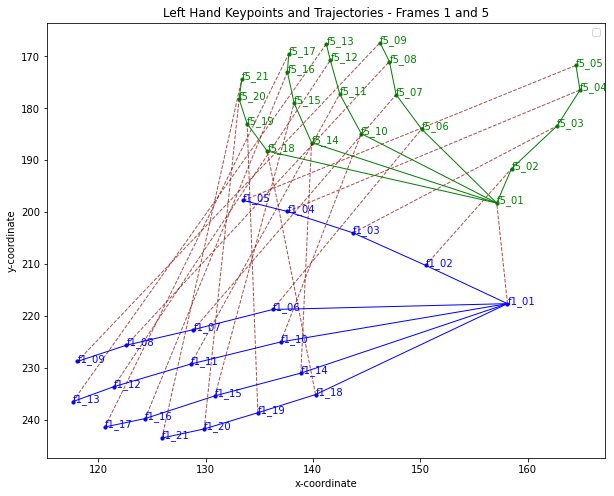

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    # Thumb connections
    ("f1_01", "f1_02"), ("f1_02", "f1_03"), ("f1_03", "f1_04"), ("f1_04", "f1_05"),
    ("f5_01", "f5_02"), ("f5_02", "f5_03"), ("f5_03", "f5_04"), ("f5_04", "f5_05"),
    # Index finger connections
    ("f1_01", "f1_06"), ("f1_06", "f1_07"), ("f1_07", "f1_08"), ("f1_08", "f1_09"),
    ("f5_01", "f5_06"), ("f5_06", "f5_07"), ("f5_07", "f5_08"), ("f5_08", "f5_09"),
    # Middle finger connections
    ("f1_01", "f1_10"), ("f1_10", "f1_11"), ("f1_11", "f1_12"), ("f1_12", "f1_13"),
    ("f5_01", "f5_10"), ("f5_10", "f5_11"), ("f5_11", "f5_12"), ("f5_12", "f5_13"),
    # Ring finger connections
    ("f1_01", "f1_14"), ("f1_14", "f1_15"), ("f1_15", "f1_16"), ("f1_16", "f1_17"),
    ("f5_01", "f5_14"), ("f5_14", "f5_15"), ("f5_15", "f5_16"), ("f5_16", "f5_17"),
    # Pinky finger connections
    ("f1_01", "f1_18"), ("f1_18", "f1_19"), ("f1_19", "f1_20"), ("f1_20", "f1_21"),
    ("f5_01", "f5_18"), ("f5_18", "f5_19"), ("f5_19", "f5_20"), ("f5_20", "f5_21")
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fifth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fifth frame keypoints
        frame_1_keypoints = keypoints[0][91:112]
        frame_5_keypoints = keypoints[4][91:112]

        # Create mappings for the keypoints
        keypoints_1 = {f"f1_{str(i-90).zfill(2)}": frame_1_keypoints[i-91] for i in range(91, 112)}
        keypoints_5 = {f"f5_{str(i-90).zfill(2)}": frame_5_keypoints[i-91] for i in range(91, 112)}

        # Create the plot
        plt.figure(figsize=(10, 8))

        # Plot the keypoints for the first frame
        for label, point in keypoints_1.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='blue', s=10)
                plt.text(x, y, label, fontsize=10, color='blue')

        # Plot the keypoints for the fifth frame
        for label, point in keypoints_5.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='green', s=10)
                plt.text(x, y, label, fontsize=10, color='green')

        # Add dashed lines for the trajectory between corresponding keypoints from frames 1 to 5
        for i in range(91, 112):
            label1 = f"f1_{str(i-90).zfill(2)}"
            label5 = f"f5_{str(i-90).zfill(2)}"
            if label1 in keypoints_1 and label5 in keypoints_5:
                x1, y1, c1 = keypoints_1[label1]
                x5, y5, c5 = keypoints_5[label5]
                if c1 > 0.5 and c5 > 0.5:
                    plt.plot([x1, x5], [y1, y5], color='darkred', linestyle='--', linewidth=1, alpha=0.7)

        # Add lines for the predefined connections
        for connection in HAND_CONNECTIONS:
            if connection[0] in keypoints_1 and connection[1] in keypoints_1:
                x1, y1, _ = keypoints_1[connection[0]]
                x2, y2, _ = keypoints_1[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)
            if connection[0] in keypoints_5 and connection[1] in keypoints_5:
                x1, y1, _ = keypoints_5[connection[0]]
                x2, y2, _ = keypoints_5[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Customize plot
        plt.title(f"Left Hand Keypoints and Trajectories - Frames 1 and 5")
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
        plt.show()


No handles with labels found to put in legend.


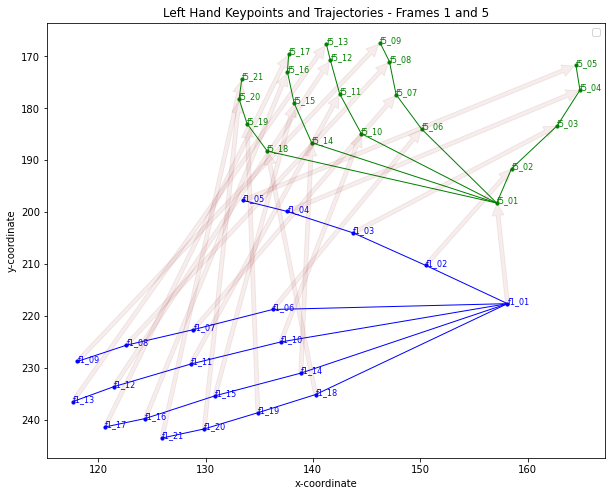

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    # Thumb connections
    ("f1_01", "f1_02"), ("f1_02", "f1_03"), ("f1_03", "f1_04"), ("f1_04", "f1_05"),
    ("f5_01", "f5_02"), ("f5_02", "f5_03"), ("f5_03", "f5_04"), ("f5_04", "f5_05"),
    # Index finger connections
    ("f1_01", "f1_06"), ("f1_06", "f1_07"), ("f1_07", "f1_08"), ("f1_08", "f1_09"),
    ("f5_01", "f5_06"), ("f5_06", "f5_07"), ("f5_07", "f5_08"), ("f5_08", "f5_09"),
    # Middle finger connections
    ("f1_01", "f1_10"), ("f1_10", "f1_11"), ("f1_11", "f1_12"), ("f1_12", "f1_13"),
    ("f5_01", "f5_10"), ("f5_10", "f5_11"), ("f5_11", "f5_12"), ("f5_12", "f5_13"),
    # Ring finger connections
    ("f1_01", "f1_14"), ("f1_14", "f1_15"), ("f1_15", "f1_16"), ("f1_16", "f1_17"),
    ("f5_01", "f5_14"), ("f5_14", "f5_15"), ("f5_15", "f5_16"), ("f5_16", "f5_17"),
    # Pinky finger connections
    ("f1_01", "f1_18"), ("f1_18", "f1_19"), ("f1_19", "f1_20"), ("f1_20", "f1_21"),
    ("f5_01", "f5_18"), ("f5_18", "f5_19"), ("f5_19", "f5_20"), ("f5_20", "f5_21")
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fifth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fifth frame keypoints
        frame_1_keypoints = keypoints[0][91:112]
        frame_5_keypoints = keypoints[4][91:112]

        # Create mappings for the keypoints
        keypoints_1 = {f"f1_{str(i-90).zfill(2)}": frame_1_keypoints[i-91] for i in range(91, 112)}
        keypoints_5 = {f"f5_{str(i-90).zfill(2)}": frame_5_keypoints[i-91] for i in range(91, 112)}

        # Create the plot
        plt.figure(figsize=(10, 8))

        # Plot the keypoints for the first frame
        for label, point in keypoints_1.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='blue', s=10)
                plt.text(x, y, label, fontsize=8, color='blue')

        # Plot the keypoints for the fifth frame
        for label, point in keypoints_5.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='green', s=10)
                plt.text(x, y, label, fontsize=8, color='green')

        # Add arrows for the trajectory between corresponding keypoints from frames 1 to 5
        for i in range(91, 112):
            label1 = f"f1_{str(i-90).zfill(2)}"
            label5 = f"f5_{str(i-90).zfill(2)}"
            if label1 in keypoints_1 and label5 in keypoints_5:
                x1, y1, c1 = keypoints_1[label1]
                x5, y5, c5 = keypoints_5[label5]
                if c1 > 0.5 and c5 > 0.5:
                    plt.annotate('', xy=(x5, y5), xytext=(x1, y1),
                                 arrowprops=dict(facecolor='darkred', edgecolor='darkred', shrink=0.005, alpha=0.07))

        # Add lines for the predefined connections
        for connection in HAND_CONNECTIONS:
            if connection[0] in keypoints_1 and connection[1] in keypoints_1:
                x1, y1, _ = keypoints_1[connection[0]]
                x2, y2, _ = keypoints_1[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)
            if connection[0] in keypoints_5 and connection[1] in keypoints_5:
                x1, y1, _ = keypoints_5[connection[0]]
                x2, y2, _ = keypoints_5[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Customize plot
        plt.title(f"Left Hand Keypoints and Trajectories - Frames 1 and 5")
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
        plt.show()


No handles with labels found to put in legend.


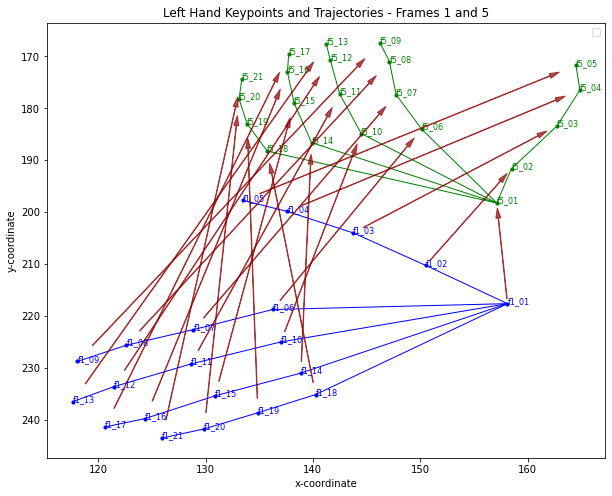

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    # Thumb connections
    ("f1_01", "f1_02"), ("f1_02", "f1_03"), ("f1_03", "f1_04"), ("f1_04", "f1_05"),
    ("f5_01", "f5_02"), ("f5_02", "f5_03"), ("f5_03", "f5_04"), ("f5_04", "f5_05"),
    # Index finger connections
    ("f1_01", "f1_06"), ("f1_06", "f1_07"), ("f1_07", "f1_08"), ("f1_08", "f1_09"),
    ("f5_01", "f5_06"), ("f5_06", "f5_07"), ("f5_07", "f5_08"), ("f5_08", "f5_09"),
    # Middle finger connections
    ("f1_01", "f1_10"), ("f1_10", "f1_11"), ("f1_11", "f1_12"), ("f1_12", "f1_13"),
    ("f5_01", "f5_10"), ("f5_10", "f5_11"), ("f5_11", "f5_12"), ("f5_12", "f5_13"),
    # Ring finger connections
    ("f1_01", "f1_14"), ("f1_14", "f1_15"), ("f1_15", "f1_16"), ("f1_16", "f1_17"),
    ("f5_01", "f5_14"), ("f5_14", "f5_15"), ("f5_15", "f5_16"), ("f5_16", "f5_17"),
    # Pinky finger connections
    ("f1_01", "f1_18"), ("f1_18", "f1_19"), ("f1_19", "f1_20"), ("f1_20", "f1_21"),
    ("f5_01", "f5_18"), ("f5_18", "f5_19"), ("f5_19", "f5_20"), ("f5_20", "f5_21")
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fifth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fifth frame keypoints
        frame_1_keypoints = keypoints[0][91:112]
        frame_5_keypoints = keypoints[4][91:112]

        # Create mappings for the keypoints
        keypoints_1 = {f"f1_{str(i-90).zfill(2)}": frame_1_keypoints[i-91] for i in range(91, 112)}
        keypoints_5 = {f"f5_{str(i-90).zfill(2)}": frame_5_keypoints[i-91] for i in range(91, 112)}

        # Create the plot
        plt.figure(figsize=(10, 8))

        # Plot the keypoints for the first frame
        for label, point in keypoints_1.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='blue', s=10)
                plt.text(x, y, label, fontsize=8, color='blue')

        # Plot the keypoints for the fifth frame
        for label, point in keypoints_5.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='green', s=10)
                plt.text(x, y, label, fontsize=8, color='green')

        # Add arrows for the trajectory between corresponding keypoints from frames 1 to 5
        for i in range(91, 112):
            label1 = f"f1_{str(i-90).zfill(2)}"
            label5 = f"f5_{str(i-90).zfill(2)}"
            if label1 in keypoints_1 and label5 in keypoints_5:
                x1, y1, c1 = keypoints_1[label1]
                x5, y5, c5 = keypoints_5[label5]
                if c1 > 0.5 and c5 > 0.5:
                    plt.annotate('', xy=(x5, y5), xytext=(x1, y1),
                                 arrowprops=dict(facecolor='darkred', edgecolor='darkred', shrink=0.05, width=0.5, headwidth=5, headlength=10, alpha=0.7))

        # Add lines for the predefined connections
        for connection in HAND_CONNECTIONS:
            if connection[0] in keypoints_1 and connection[1] in keypoints_1:
                x1, y1, _ = keypoints_1[connection[0]]
                x2, y2, _ = keypoints_1[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)
            if connection[0] in keypoints_5 and connection[1] in keypoints_5:
                x1, y1, _ = keypoints_5[connection[0]]
                x2, y2, _ = keypoints_5[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Customize plot
        plt.title(f"Left Hand Keypoints and Trajectories - Frames 1 and 5")
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
        plt.show()


No handles with labels found to put in legend.


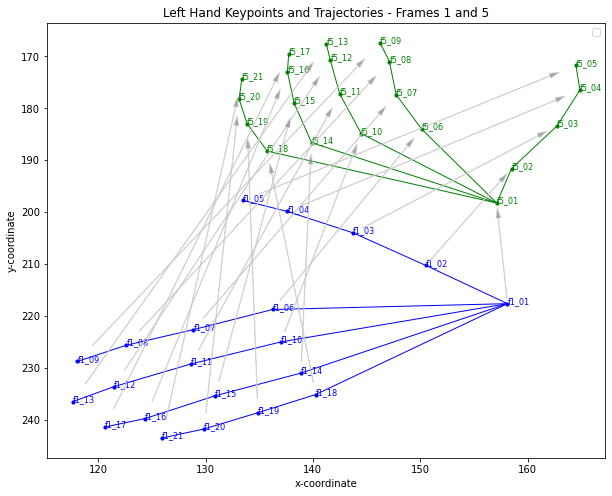

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    # Thumb connections
    ("f1_01", "f1_02"), ("f1_02", "f1_03"), ("f1_03", "f1_04"), ("f1_04", "f1_05"),
    ("f5_01", "f5_02"), ("f5_02", "f5_03"), ("f5_03", "f5_04"), ("f5_04", "f5_05"),
    # Index finger connections
    ("f1_01", "f1_06"), ("f1_06", "f1_07"), ("f1_07", "f1_08"), ("f1_08", "f1_09"),
    ("f5_01", "f5_06"), ("f5_06", "f5_07"), ("f5_07", "f5_08"), ("f5_08", "f5_09"),
    # Middle finger connections
    ("f1_01", "f1_10"), ("f1_10", "f1_11"), ("f1_11", "f1_12"), ("f1_12", "f1_13"),
    ("f5_01", "f5_10"), ("f5_10", "f5_11"), ("f5_11", "f5_12"), ("f5_12", "f5_13"),
    # Ring finger connections
    ("f1_01", "f1_14"), ("f1_14", "f1_15"), ("f1_15", "f1_16"), ("f1_16", "f1_17"),
    ("f5_01", "f5_14"), ("f5_14", "f5_15"), ("f5_15", "f5_16"), ("f5_16", "f5_17"),
    # Pinky finger connections
    ("f1_01", "f1_18"), ("f1_18", "f1_19"), ("f1_19", "f1_20"), ("f1_20", "f1_21"),
    ("f5_01", "f5_18"), ("f5_18", "f5_19"), ("f5_19", "f5_20"), ("f5_20", "f5_21")
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Only visualize the first and fifth frames for the selected video
    if video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute":
        # Get the first and fifth frame keypoints
        frame_1_keypoints = keypoints[0][91:112]
        frame_5_keypoints = keypoints[4][91:112]

        # Create mappings for the keypoints
        keypoints_1 = {f"f1_{str(i-90).zfill(2)}": frame_1_keypoints[i-91] for i in range(91, 112)}
        keypoints_5 = {f"f5_{str(i-90).zfill(2)}": frame_5_keypoints[i-91] for i in range(91, 112)}

        # Create the plot
        plt.figure(figsize=(10, 8))

        # Plot the keypoints for the first frame
        for label, point in keypoints_1.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='blue', s=10)
                plt.text(x, y, label, fontsize=8, color='blue')

        # Plot the keypoints for the fifth frame
        for label, point in keypoints_5.items():
            x, y, c = point
            if c > 0.5:
                plt.scatter(x, y, color='green', s=10)
                plt.text(x, y, label, fontsize=8, color='green')

        # Add dashed arrows for the trajectory between corresponding keypoints from frames 1 to 5
        for i in range(91, 112):
            label1 = f"f1_{str(i-90).zfill(2)}"
            label5 = f"f5_{str(i-90).zfill(2)}"
            if label1 in keypoints_1 and label5 in keypoints_5:
                x1, y1, c1 = keypoints_1[label1]
                x5, y5, c5 = keypoints_5[label5]
                if c1 > 0.5 and c5 > 0.5:
                    plt.annotate('', xy=(x5, y5), xytext=(x1, y1),
                                 arrowprops=dict(facecolor='gray', edgecolor='lightgray', linestyle='dashed', shrink=0.05, width=0.5, headwidth=5, headlength=10, alpha=0.7))

        # Add lines for the predefined connections
        for connection in HAND_CONNECTIONS:
            if connection[0] in keypoints_1 and connection[1] in keypoints_1:
                x1, y1, _ = keypoints_1[connection[0]]
                x2, y2, _ = keypoints_1[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='blue', linestyle='-', linewidth=1)
            if connection[0] in keypoints_5 and connection[1] in keypoints_5:
                x1, y1, _ = keypoints_5[connection[0]]
                x2, y2, _ = keypoints_5[connection[1]]
                plt.plot([x1, x2], [y1, y2], color='green', linestyle='-', linewidth=1)

        # Customize plot
        plt.title(f"Left Hand Keypoints and Trajectories - Frames 1 and 5")
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
        plt.show()


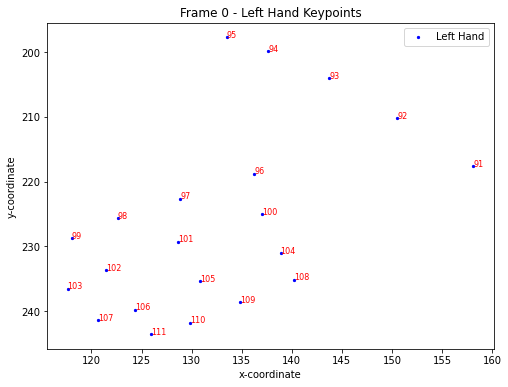

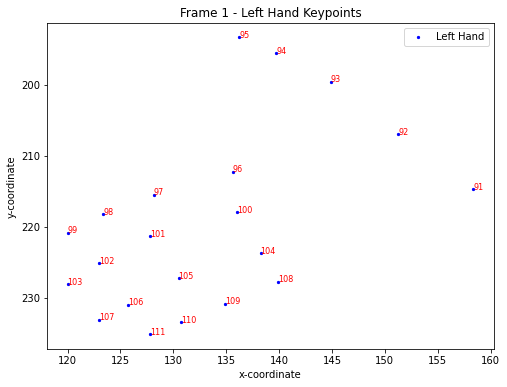

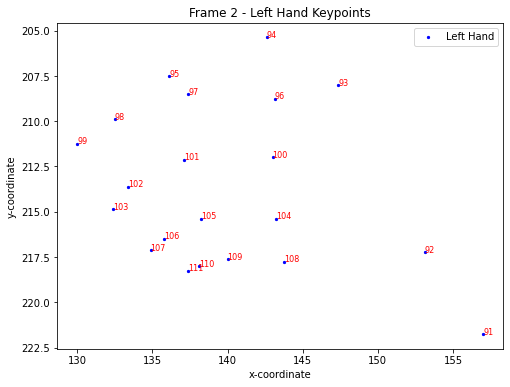

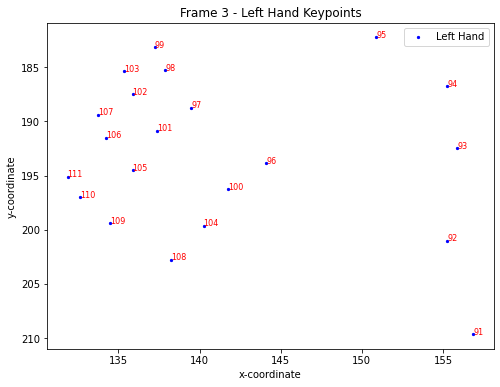

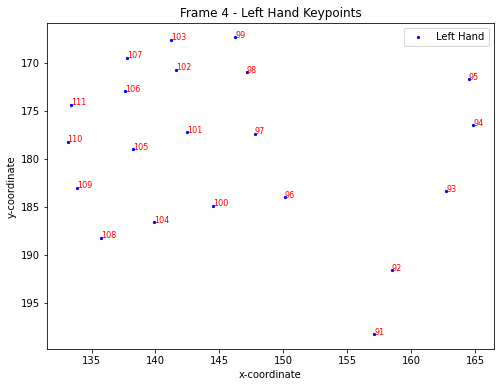

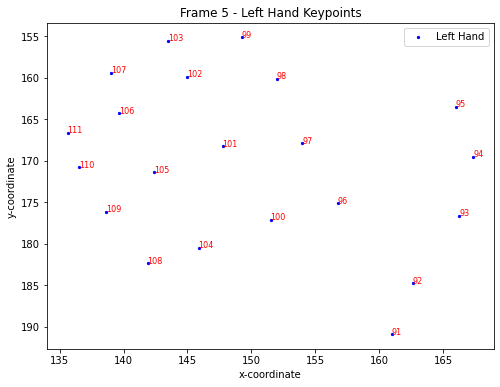

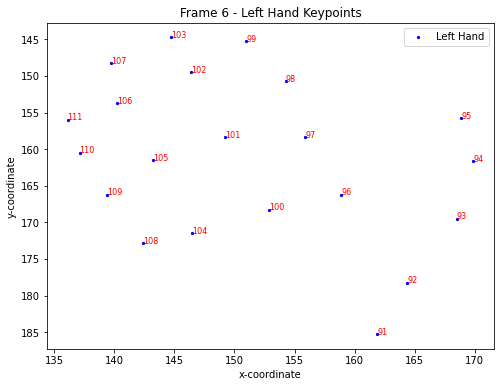

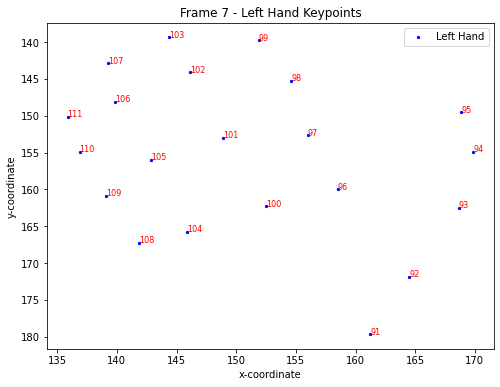

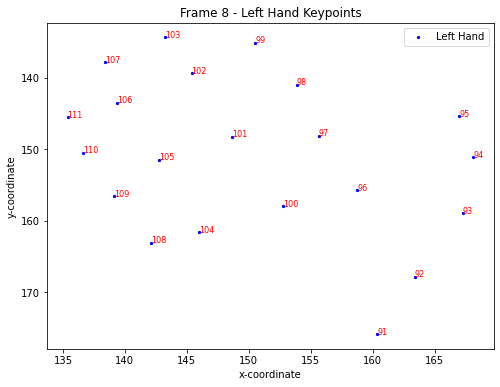

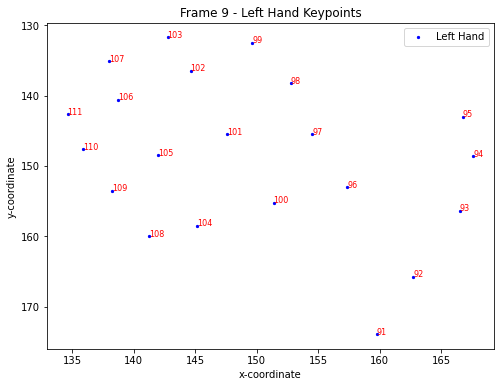

KeyboardInterrupt: 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Iterate through each frame
    for frame_index, frame_keypoints in enumerate(keypoints):
        frame_image = load_image(frame_index, video_key)  # Load the corresponding image
        frame_image = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Only visualize for specific video and frames
        if (video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute") and (frame_index < 10):
            
            # Separate the keypoints for the left hand (assuming indices 91-111)
            left_hand_keypoints = frame_keypoints[91:112]

            # Create the plot
            plt.figure(figsize=(8, 6))

            # Plot left hand keypoints (in blue)
            plt.scatter(left_hand_keypoints[:, 0], left_hand_keypoints[:, 1], color='blue', s=5, label='Left Hand')

            # Add order numbers next to each keypoint
            for i, (x, y, c) in enumerate(left_hand_keypoints):  # Unpack x, y, and c
                plt.text(x, y, f'{i+91}', fontsize=8, color='red')  # i+91 to show original index

            # Customize plot
            plt.title(f"Frame {frame_index} - Left Hand Keypoints")
            plt.xlabel('x-coordinate')
            plt.ylabel('y-coordinate')
            plt.legend()
            plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
            plt.show()


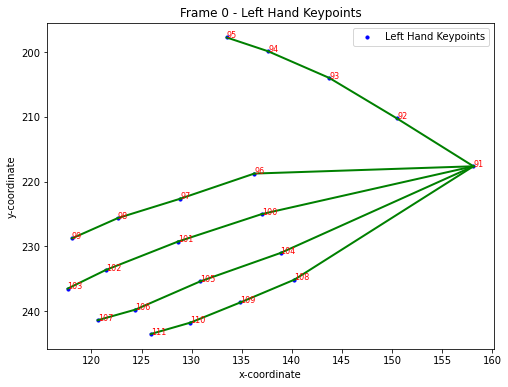

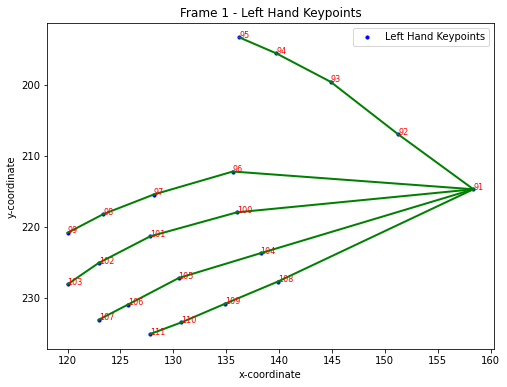

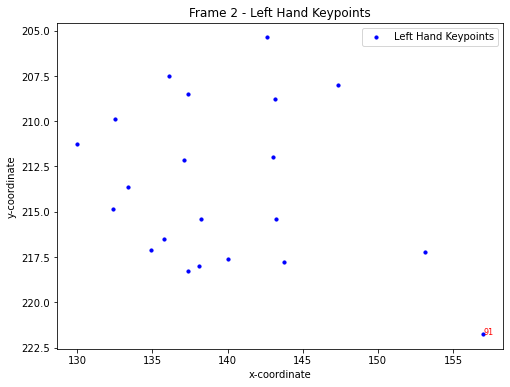

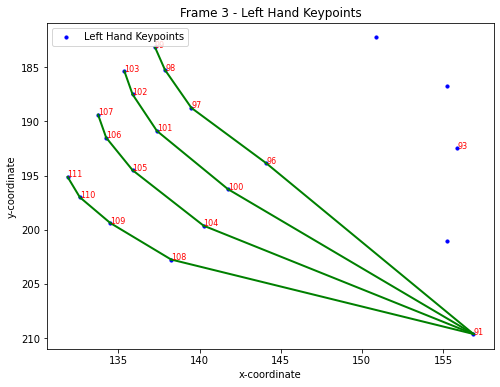

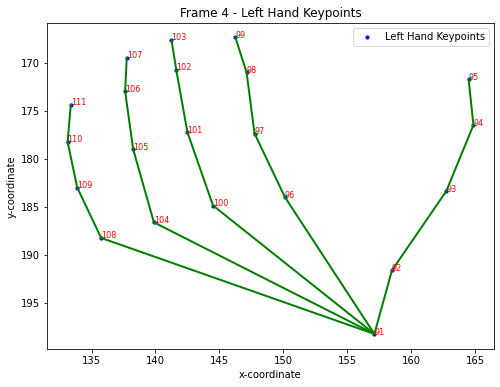

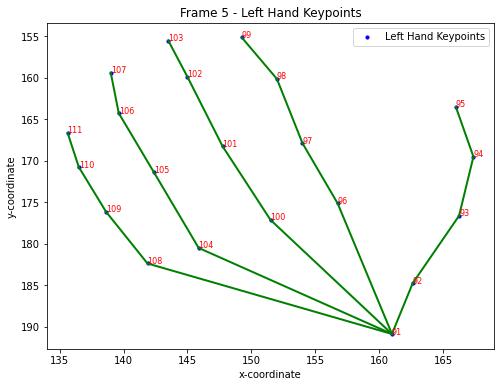

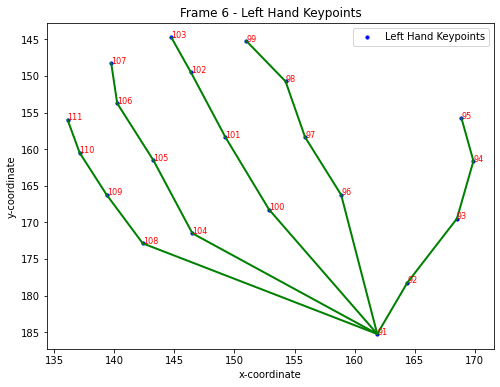

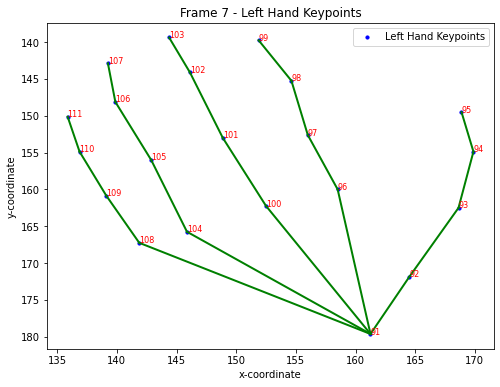

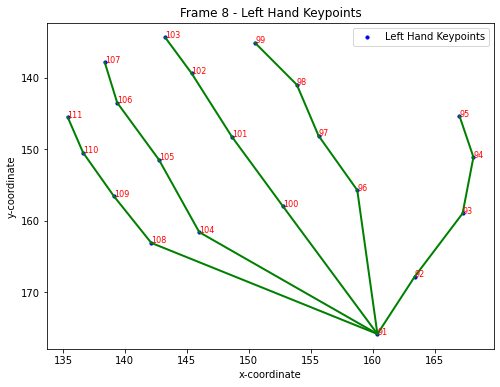

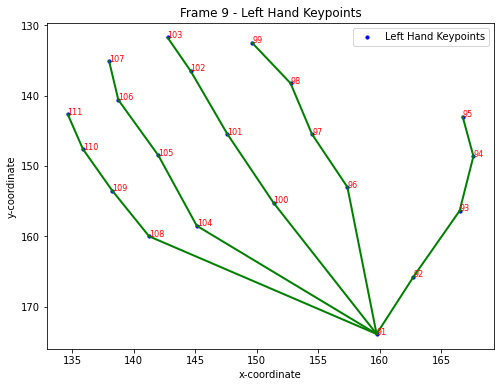

KeyboardInterrupt: 

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define connections for the hand keypoints (e.g., wrist to fingers, finger joints)
HAND_CONNECTIONS = [
    (91, 92), (92, 93), (93, 94), (94, 95),  # Thumb
    (91, 96), (96, 97), (97, 98), (98, 99),  # Index finger
    (91, 100), (100, 101), (101, 102), (102, 103),  # Middle finger
    (91, 104), (104, 105), (105, 106), (106, 107),  # Ring finger
    (91, 108), (108, 109), (109, 110), (110, 111)  # Pinky finger
]

# Function to load the image data for each frame
def load_image(frame_index, video_key):
    image_path = f"/nas/Dataset/Phoenix/phoenix2014-release/phoenix-2014-multisigner/features/{video_key}.avi_pid0_fn000{frame_index:03d}-0.png"
    return cv2.imread(image_path)

# Iterate through each video
for video_key, video_data in data.items():
    keypoints = video_data['keypoints']

    # Iterate through each frame
    for frame_index, frame_keypoints in enumerate(keypoints):
        frame_image = load_image(frame_index, video_key)  # Load the corresponding image
        if frame_image is None:
            print(f"Image not found for frame {frame_index} in video {video_key}.")
            continue
        
        frame_image = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Only visualize for specific video and frames
        if (video_key == "fullFrame-210x260px/train/01April_2010_Thursday_heute_default-0/1/01April_2010_Thursday_heute") and (frame_index < 10):
            
            # Separate the keypoints for the left hand (assuming indices 91-111)
            left_hand_keypoints = frame_keypoints[91:112]

            # Create the plot
            plt.figure(figsize=(8, 6))

            # Plot left hand keypoints (in blue)
            for connection in HAND_CONNECTIONS:
                start, end = connection
                if start - 91 < len(left_hand_keypoints) and end - 91 < len(left_hand_keypoints):
                    x_start, y_start, c_start = left_hand_keypoints[start - 91]
                    x_end, y_end, c_end = left_hand_keypoints[end - 91]

                    # Check if confidence (c) for both keypoints is sufficient
                    if c_start > 0.5 and c_end > 0.5:  # Adjust threshold as needed
                        plt.plot([x_start, x_end], [y_start, y_end], color='green', linewidth=2)

            plt.scatter(left_hand_keypoints[:, 0], left_hand_keypoints[:, 1], color='blue', s=10, label='Left Hand Keypoints')

            # Add order numbers next to each keypoint
            for i, (x, y, c) in enumerate(left_hand_keypoints):  # Unpack x, y, and c
                if c > 0.5:  # Only label visible keypoints
                    plt.text(x, y, f'{i+91}', fontsize=8, color='red')  # i+91 to show original index

            # Customize plot
            plt.title(f"Frame {frame_index} - Left Hand Keypoints")
            plt.xlabel('x-coordinate')
            plt.ylabel('y-coordinate')
            plt.legend()
            plt.gca().invert_yaxis()  # Invert y-axis for correct visual alignment
            plt.show()
